# Python in engineering: General Introduction

## Python general info
Based on from 
- https://codingnomads.co/blog/business/why-learn-python/
- https://python-programming.quantecon.org/about_py.html

- Why python: (https://pythonpedia.com/)
  - Learning to program
  - Web 
  - Scientific computation and plotting
  - Embeded
  - Machine learning: Tensor Flow, Keras, Pytorch
  - Games
  - Gui: http://kivy.org/
  - Data Analysis
  - Gluing apps
  - Quantitative economics: https://python.quantecon.org/
  - Finance: https://www.netguru.com/blog/how-python-is-used-in-finance-and-fintech
  - Parallel programming (cpu / gpu)
  - Hacking (CIA leak vault7)
  - Some examples:
    - Google: at the beginning the founders of Google made the
      decision to use “Python where we can, C++ where we must.”
    - Facebook: Python is the third most popular language at the
      social media giant (just behind C++ and their proprietary PHP
      dialect).
    - Instagram: in 2016, the Instagram engineering team boasted
      that they were running the world’s largest deployment of the
      Django web framework, which is written entirely in Python.
    - Spotify: they use Python primarily for data analysis and back
      end services.
    - Netflix: they rely on Python to power the data analysis on
      the server side.
    - Reddit: the platform was rewritten from Lisp to Python
      because the latter language had a wider range of code
      libraries and was more flexible development-wise.






- Who uses python?
![python-used-by](https://codingnomads.co/wp-content/uploads/2019/06/PythonCompanies.png)

- Job posting
![Source](https://codingnomads.co/wp-content/uploads/2019/02/TopLanguagesGraph_2019.png)


* Language trends
![lang-trends](figs/00-lang-trends.svg)
Source : https://insights.stackoverflow.com/trends?tags=python%2Cjava%2Cjavascript%2Cc%23%2Cc%2B%2B%2Cphp)

- Python modules trends
![modules-trends](figs/00-mods-trends.svg)
Source: https://insights.stackoverflow.com/trends?tags=pandas%2Ctensorflow%2Cnumpy%2Cpyspark%2Cmatplotlib%2Cscikit-learn

## Scientific Computation
The main library here is scipy, which offers:

* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

### ODE solving
This requires that you install `scipy`, `numpy` and `matplotlib`. You can do it by running
```
conda install scipy numpy matplotlib
```

In [1]:
# Lorenz model
from scipy.integrate import solve_ivp
import numpy as np

A=10.0; B=8.0/3.0 ; R=28.0

X0=5; Y0=5; Z0=5; T0=0; TF=30; DT=0.03125

def fderiv(t, y): 
    return np.array([-A*y[0] + A*y[1], 
                     R*y[0] -y[1] - y[0]*y[2], 
                     -B*y[2] + y[0]*y[1]])

sol1 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0, Y0, Z0])
sol2 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0+0.0001, Y0, Z0])

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax[0, 0].plot(sol1.t, sol1.y[0])
ax[0, 0].plot(sol2.t, sol2.y[0])
ax[0, 0].set_xlabel(r"$t$[s]")
ax[0, 0].set_ylabel(r"$x(t)$")
ax[0, 1].plot(sol1.y[0], sol1.y[1])
ax[0, 1].set_xlabel(r"$y$")
ax[0, 1].set_ylabel(r"$x$")
ax[1, 0].plot(sol1.y[0], sol1.y[2])
ax[1, 0].set_xlabel(r"$z$")
ax[1, 0].set_ylabel(r"$x$")
ax[1, 1].plot(sol1.y[1], sol1.y[2])
ax[1, 1].set_xlabel(r"$z$")
ax[1, 1].set_ylabel(r"$y$")


<IPython.core.display.Javascript object>

Text(0, 0.5, '$y$')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol1.y[0], sol1.y[1], sol1.y[2])


<IPython.core.display.Javascript object>

### Linear and non-linear systems
Finding the root for a multi-variable function
$$\vec f(x,y) = (x + 0.5(x-y)^3 -1, 0.5(y-x)^3 + y)$$

In [3]:
from scipy import optimize
import numpy as np

# x is a list (x[0] = x, x[1] = y)
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0, 0.5 * (x[1] - x[0])**3 + x[1]]

sol = optimize.root(fun, [0, 0],  method='hybr')
print("Solution: ", sol.x)
#print("f(x): ", fun(sol.x))
print(fun(sol.x))

Solution:  [0.8411639 0.1588361]
[-1.1102230246251565e-16, 0.0]


In [4]:
import numpy as np
from scipy import linalg
A = np.array([[0., -1.], [1., 0.]])
#A = np.array([[1, 0.], [0., 2.]])
#A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
#A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
sol = linalg.eig(A) # magic
print("Eigen-values: ", sol[0])
print("Eigen-vectors:\n", sol[1])
# verify
print("Verification: ", A.dot(sol[1][:, 0]) - sol[0][0]*sol[1][:, 0])


Eigen-values:  [0.+1.j 0.-1.j]
Eigen-vectors:
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
Verification:  [0.+0.j 0.+0.j]


### Numerical Optimization (Focus topic)

[0.99999999 0.99999999]
[2. 1.]


<IPython.core.display.Javascript object>


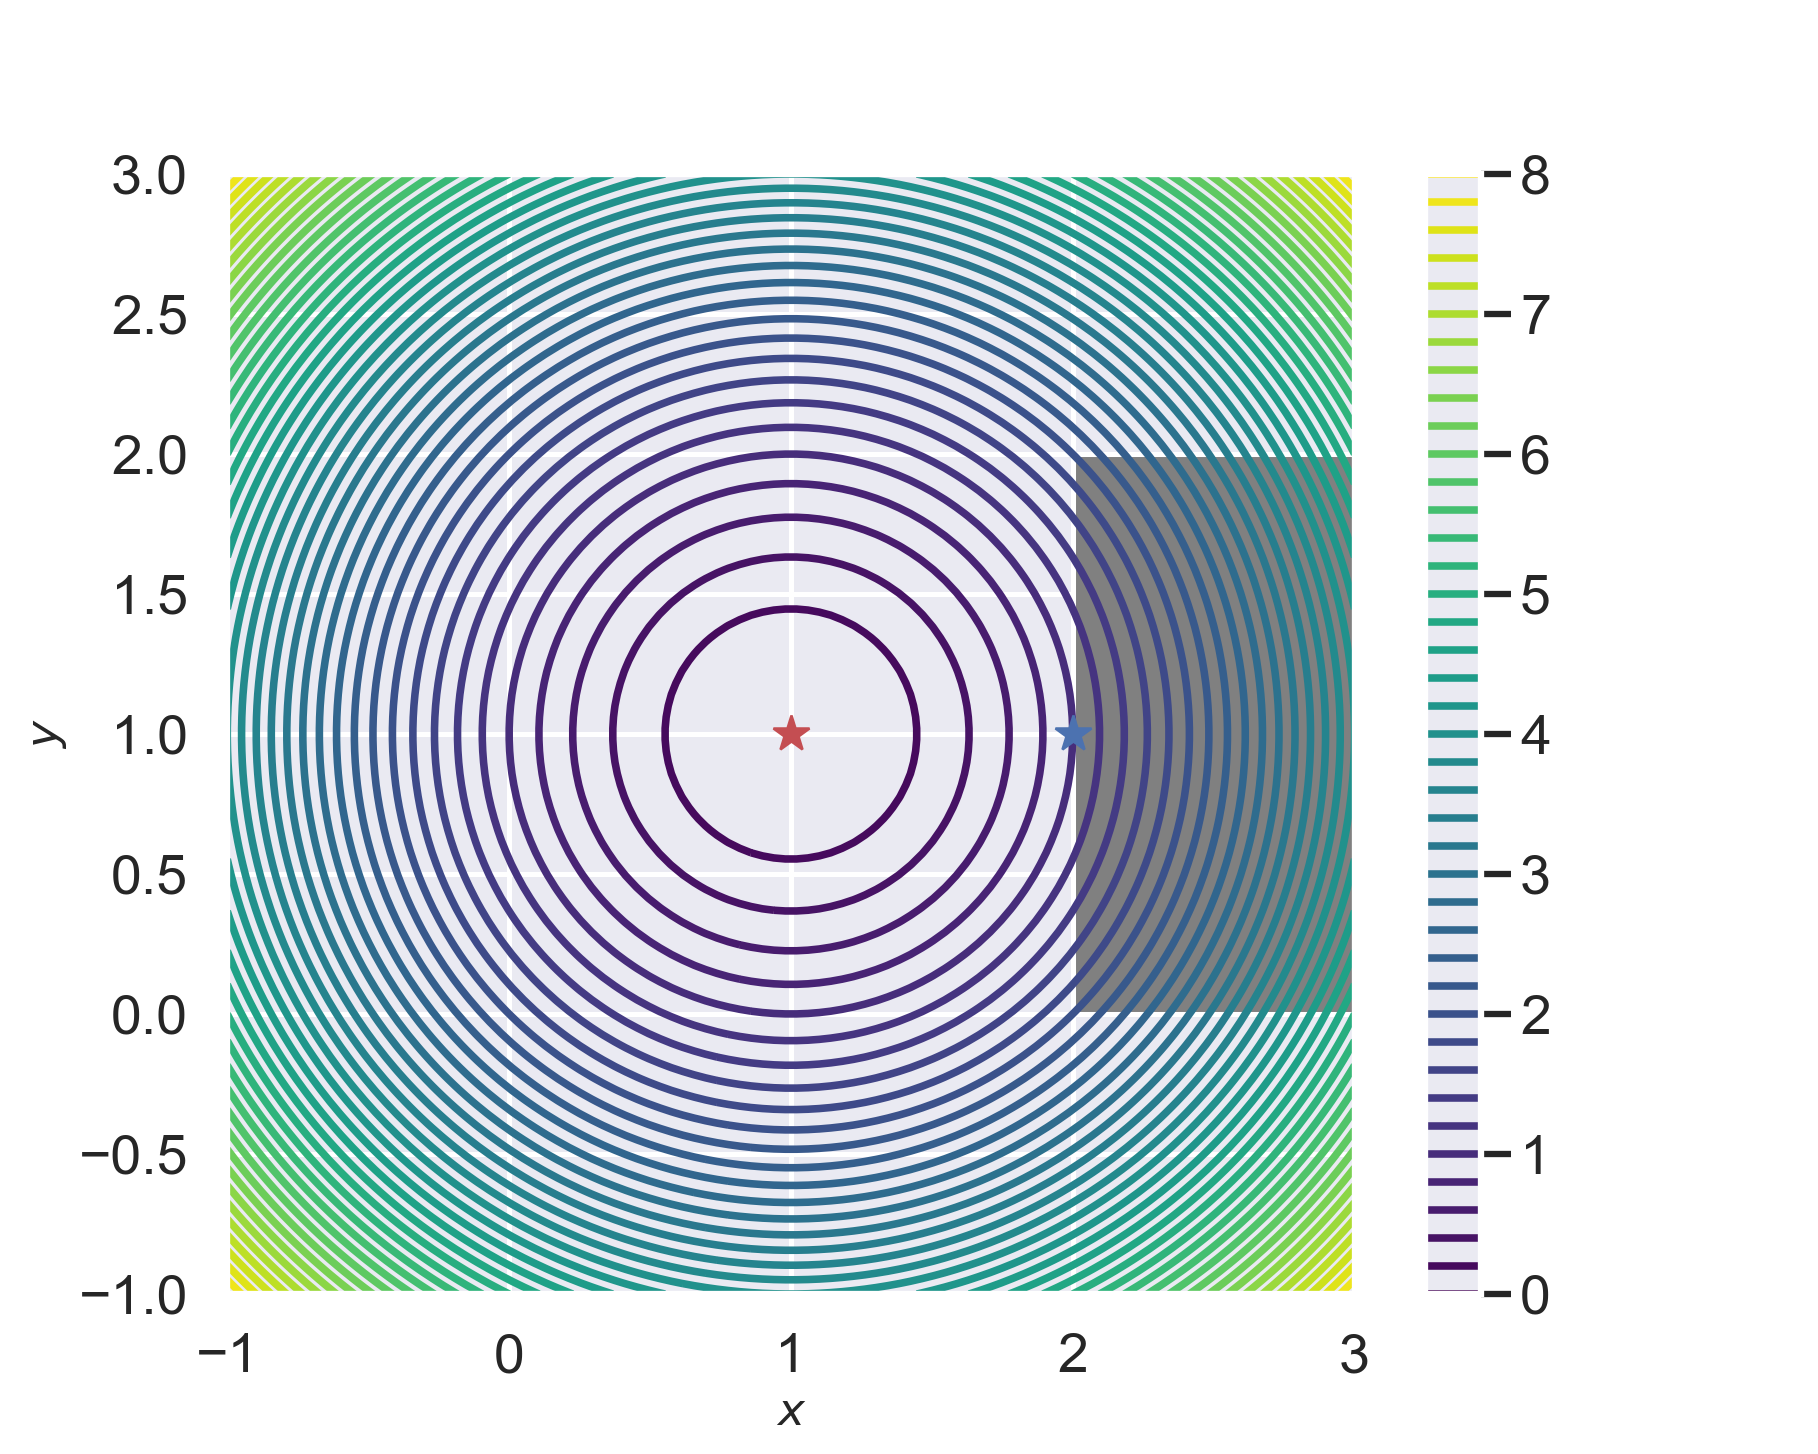

In [11]:
from scipy.optimize import minimize

# Let's define a new function to estimate
def func2D(X):
    x,y=X
    return (x-1)**2+(y-1)**2

x0=[0,0]  # This is the initiall guess, which is mandatory

# optimizing without constraints
res=minimize(func2D,x0, method='BFGS')
print(res.x)

# optimizing with the constrains, we define the boundaries as tuples
bnd1,bnd2=(2,3),(0,2)
res_cons=minimize(func2D,x0, method='L-BFGS-B', bounds=[bnd1,bnd2])
print(res_cons.x)

## We first plot the function
fig, axes1 = plt.subplots(figsize=(10, 8))   # We create the axes to plot
x_=y_=np.linspace(-1,3,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = axes1.contour(X, Y, func2D([X, Y]), 50, cmap='viridis') # The 50 is the number of countour lines
axes1.set_xlabel(r"$x$", fontsize=18)  # we set the x label
axes1.set_ylabel(r"$y$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=axes1)                # We add a colorbar

# Plotting the result for the unconstrained method
axes1.plot(res.x[0],res.x[1], 'r*', markersize=15)

# Plotting the result for the unconstrained method
axes1.plot(res_cons.x[0],res_cons.x[1], 'b*', markersize=15)

# Lets highlight the constrained region
 # we define a rectangle: Rectangle((origin), width,height)
bound=plt.Rectangle((bnd1[0],bnd2[0]),bnd1[1]-bnd1[0],bnd2[1]-bnd2[0], facecolor="grey")
axes1.add_patch(bound)

## Symbolic calculus
[sympy](https://www.sympy.org/en/index.html)

In [6]:
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing(use_unicode=True)
diff(cos(x), x)

In [7]:
integrate(cos(x), x)

In [8]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

## Interactive Ploting examples

### notebook

<IPython.core.display.Javascript object>


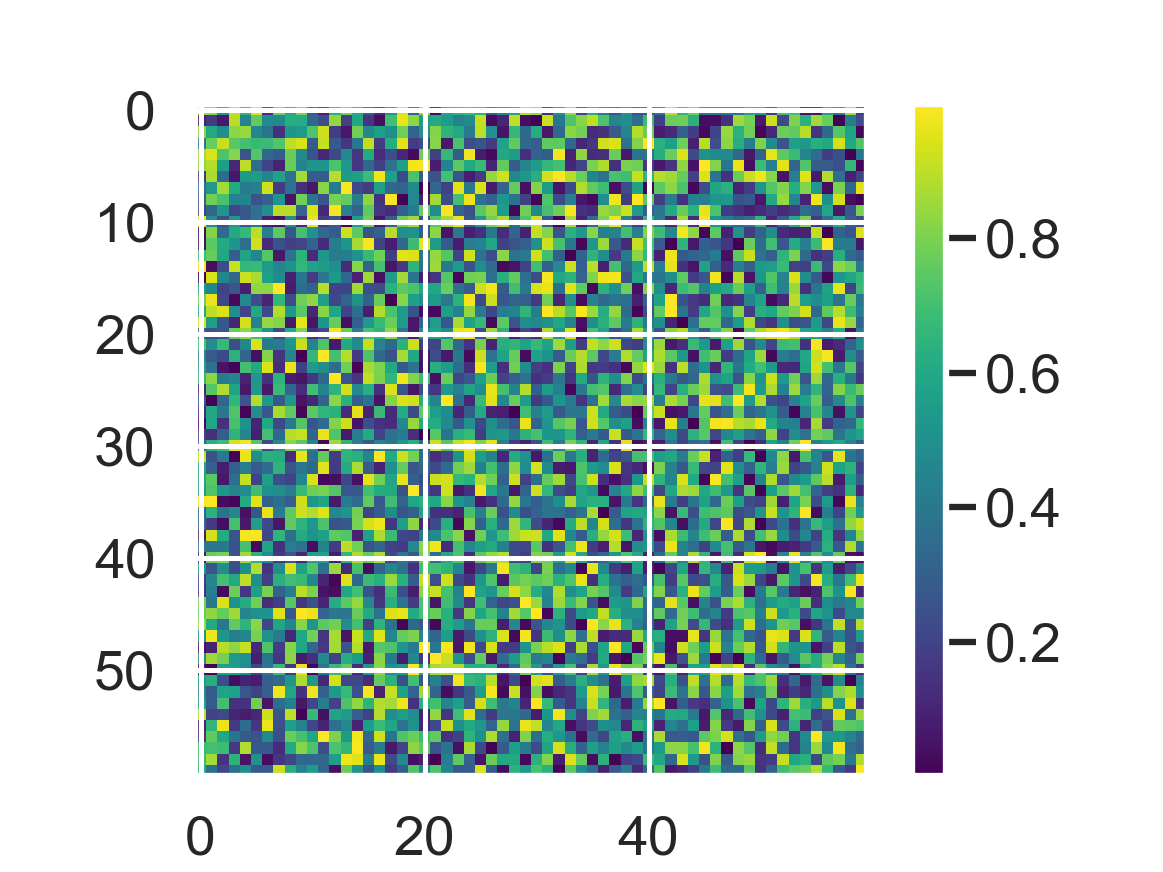

In [9]:
%matplotlib notebook
# From http://scipy-lectures.org/intro/numpy/numpy.html
import numpy as np
import matplotlib.pyplot as plt

image = np.random.rand(60, 60)
plt.imshow(image, cmap=plt.cm.viridis) # viridis, heat, magma
plt.colorbar()

### ipyvolume

In [10]:
#See: https://ipyvolume.readthedocs.io/en/latest/
# conda install ipyvolume
# jupyter nbextension enable --py --sys-prefix ipyvolume
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)

ModuleNotFoundError: No module named 'ipyvolume'

### bokeh
```
conda install bokeh
```

In [ ]:
import numpy as np
from bokeh.plotting import output_file, show, figure
from bokeh.io import output_notebook

#TOOLS=""
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
output_notebook()

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

#output_file("legend.html")

#p = figure()
#p = figure(tools=TOOLS)
p = figure(tools=TOOLS,tooltips=[("x", "$x"), ("y", "$y")])

p.circle(x, y, legend_label="sin(x)")
p.line(x, y, legend_label="sin(x)")

p.line(x, 2*y, legend_label="2*sin(x)", line_dash=[4, 4], line_color="orange", line_width=2)

p.square(x, 3*y, legend_label="3*sin(x)", fill_color=None, line_color="green")
p.line(x, 3*y, legend_label="3*sin(x)", line_color="green")

p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)


## Processing pdf, excel, word


### Excel 
openpyxl: https://openpyxl.readthedocs.io/en/stable/
```
conda install openpyxl
```
Ref material from `Automate the boring stuff with python`, http://nostarch.com/automatestuff/ . 

In [ ]:
import openpyxl as xl
wb = xl.load_workbook('files/Excel-example.xlsx')
print("type:", type(wb))
print(wb.sheetnames)
sheet = wb['Sheet1']
print(sheet['A1'].value)
print(sheet['C3'].value)
print(sheet['A1':'C3'])
# Modify the workbook
sheet.title = 'NEW SHEET TITLE'
wb.create_sheet('NEW sheet')
sheet = wb['NEW sheet']
# modify some format
from openpyxl.styles import colors
from openpyxl.styles import Font, Color
sheet['A1'] = 'Hello world!'
sheet['A1'].font = Font(color="FF0000", italic = True)
#italic24Font = fonts(size=24, italic=True)
#styleObj = Style(font=italic24Font)
#sheet['A'].style/styleObj
sheet['B3'] = 'Hello world B3!'
print("Writing results ...")
wb.save('tmp/out.xlsx')

## Data Processing and Analysis (Focus topic)
There are many tools to process and analyze data. Here we will use pandas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/jrjohansson/numerical-python-book-code/master/european_cities.csv")
df.info()

In [ ]:
df.head(4)

In [ ]:
df.dtypes

In [ ]:
df['Numeric Population'] = df.Population.apply(lambda x: int(x.replace(',', ''))) # create a new column
df.head()

## Image Manipulation
From: http://scipy-lectures.org/advanced/image_processing/

In [ ]:
%matplotlib inline
from scipy import misc
import imageio
f = misc.face()
imageio.imwrite('tmp/face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [ ]:
from scipy import ndimage
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_face)

In [ ]:
# up <-> down flip
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

In [ ]:
# rotation
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)


## Machine Learning
- Keras: https://keras.io/
- Tensorflow: https://www.tensorflow.org/
- Pytorch : https://pytorch.org/
- Scikit-learn : https://scikit-learn.org/stable/auto_examples/index.html

In [ ]:
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## Visualization (vpython/Glowscript)
https://vpython.org/


In [ ]:
from vpython import *
scene.caption = """To rotate "camera", drag with right button or Ctrl-drag.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
  On a two-button mouse, middle is left + right.
To pan left/right and up/down, Shift-drag.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""

side = 4.0
thk = 0.3
s2 = 2*side - thk
s3 = 2*side + thk

wallR = box (pos=vector( side, 0, 0), size=vector(thk, s2, s3),  color = color.red)
wallL = box (pos=vector(-side, 0, 0), size=vector(thk, s2, s3),  color = color.red)
wallB = box (pos=vector(0, -side, 0), size=vector(s3, thk, s3),  color = color.blue)
wallT = box (pos=vector(0,  side, 0), size=vector(s3, thk, s3),  color = color.blue)
wallBK = box(pos=vector(0, 0, -side), size=vector(s2, s2, thk), color = color.gray(0.7))

ball = sphere (color = color.green, radius = 0.4, make_trail=True, retain=200)
ball.mass = 1.0
ball.p = vector (-0.15, -0.23, +0.27)

side = side - thk*0.5 - ball.radius

dt = 0.3
while True:
    rate(200)
    ball.pos = ball.pos + (ball.p/ball.mass)*dt
    if not (side > ball.pos.x > -side):
        ball.p.x = -ball.p.x
    if not (side > ball.pos.y > -side):
        ball.p.y = -ball.p.y
    if not (side > ball.pos.z > -side):
        ball.p.z = -ball.p.z